In [1]:
using Pkg
#Pkg.add("Distributions")
#Pkg.add("Optim")
#Pkg.add("StatsPlots")
#Pkg.add("BlackBoxOptim")
#Pkg.add("ForwardDiff")
Pkg.add("StatsBase")
using Distributions,ForwardDiff, Optim

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [2913bbd2] + StatsBase v0.33.21
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
F = TruncatedNormal(.5,.4,0,1)

Truncated(Normal{Float64}(μ=0.5, σ=0.4); lower=0.0, upper=1.0)

In [3]:
cdf(F,.9)

0.9327939015561474

In [4]:
using StatsPlots


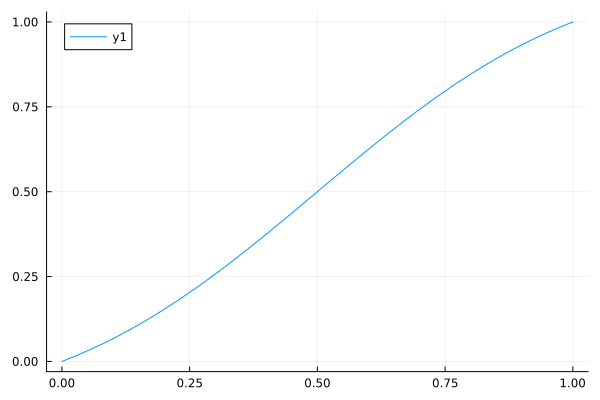

In [5]:
plot(x -> cdf(F,x),0,1)

In [6]:
data = [.1,.15,.21,.22,.25,.25,.26,.33,.35,.44,.51,.6,.65]

13-element Vector{Float64}:
 0.1
 0.15
 0.21
 0.22
 0.25
 0.25
 0.26
 0.33
 0.35
 0.44
 0.51
 0.6
 0.65

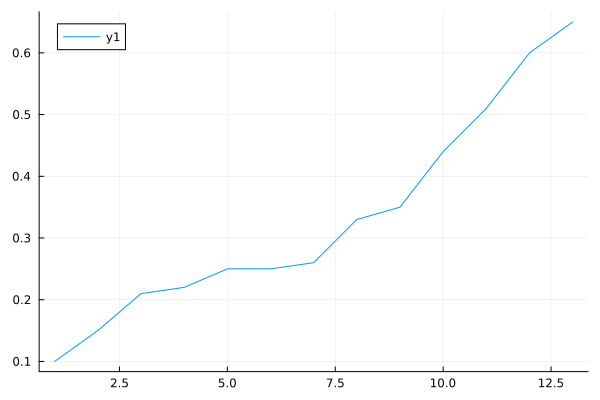

In [7]:
x = 1:13
p = plot(x, data)
#y = rand(10);
#typeof(data)
p

In [8]:
data2 = [0.99999, 0.863013698630137, 0.7602739726027398, 0.7431506849315068, 0.726027397260274, 0.708904109589041, 0.6917808219178082, 0.6746575342465754, 0.6541095890410958, 0.6232876712328768, 0.6061643835616438, 0.5941780821917808, 0.5821917808219178, 0.541095890410959, 0.523972602739726, 0.5034246575342466, 0.4863013698630137, 0.4520547945205479, 0.4178082191780822, 0.4092465753424658, 0.3835616438356164, 0.3321917808219178, 0.3236301369863014, 0.3150684931506849, 0.1404109589041096, 0.13356164383561644, 0.1267123287671233, 0.1095890410958904, 0.10616438356164383, 0.10273972602739725, 0.0958904109589041, 0.015410958904109588, 0.00684931506849315, 0.0, 1.0, 0.863013698630137, 0.7602739726027398, 0.7431506849315068, 0.726027397260274, 0.708904109589041, 0.6917808219178082, 0.6746575342465754, 0.6541095890410958, 0.6232876712328768, 0.6061643835616438, 0.5941780821917808, 0.5821917808219178, 0.541095890410959, 0.523972602739726, 0.5034246575342466, 0.4863013698630137, 0.4520547945205479, 0.4178082191780822, 0.4092465753424658, 0.3835616438356164, 0.3321917808219178, 0.3236301369863014, 0.3150684931506849, 0.1404109589041096, 0.13356164383561644, 0.1267123287671233, 0.1095890410958904, 0.10616438356164383, 0.10273972602739725, 0.0958904109589041, 0.015410958904109588, 0.00684931506849315, 1.0e-7]

68-element Vector{Float64}:
 0.99999
 0.863013698630137
 0.7602739726027398
 0.7431506849315068
 0.726027397260274
 0.708904109589041
 0.6917808219178082
 0.6746575342465754
 0.6541095890410958
 0.6232876712328768
 0.6061643835616438
 0.5941780821917808
 0.5821917808219178
 ⋮
 0.3236301369863014
 0.3150684931506849
 0.1404109589041096
 0.13356164383561644
 0.1267123287671233
 0.1095890410958904
 0.10616438356164383
 0.10273972602739725
 0.0958904109589041
 0.015410958904109588
 0.00684931506849315
 1.0e-7

In [9]:
data3 = 380*data2

68-element Vector{Float64}:
 379.99620000000004
 327.94520547945206
 288.9041095890411
 282.3972602739726
 275.8904109589041
 269.3835616438356
 262.8767123287671
 256.36986301369865
 248.56164383561642
 236.84931506849318
 230.34246575342465
 225.7876712328767
 221.23287671232876
   ⋮
 122.97945205479452
 119.72602739726027
  53.35616438356165
  50.75342465753425
  48.15068493150685
  41.64383561643835
  40.342465753424655
  39.04109589041096
  36.438356164383556
   5.8561643835616435
   2.602739726027397
   3.7999999999999995e-5

In [20]:
function l(params,x)
    F = TruncatedNormal(params[1],params[2],0,Inf)
    #print(typeof(F))
    p=0
    for y in x
        #print(y)
        #print(" ")
        #print(pdf(F,y))
        p = p+log(pdf(F,y))
    end
    return -p
end

l (generic function with 1 method)

In [21]:
show(l([350,350],data3))

461.5071761512707

In [12]:
res = optimize(params -> l(params, data), [0.5, 0.2])


 * Status: success

 * Candidate solution
    Final objective value:     -5.423482e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    36
    f(x) calls:    70


In [13]:
pair = Optim.minimizer(res)

2-element Vector{Float64}:
 0.31677705493244657
 0.17918637617910327

In [14]:
best = TruncatedNormal(pair[1],pair[2],0,1)

Truncated(Normal{Float64}(μ=0.31677705493244657, σ=0.17918637617910327); lower=0.0, upper=1.0)

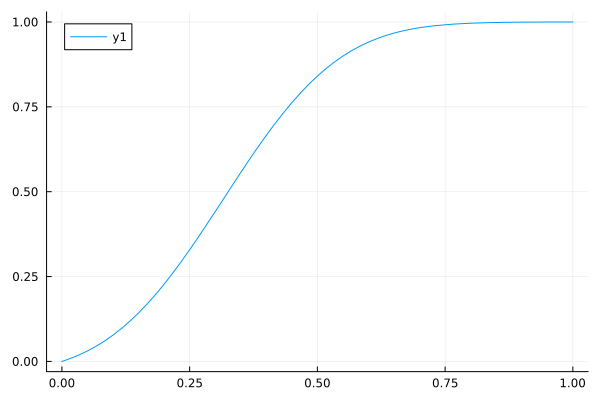

In [15]:
plot(x -> cdf(best,x),0,1)

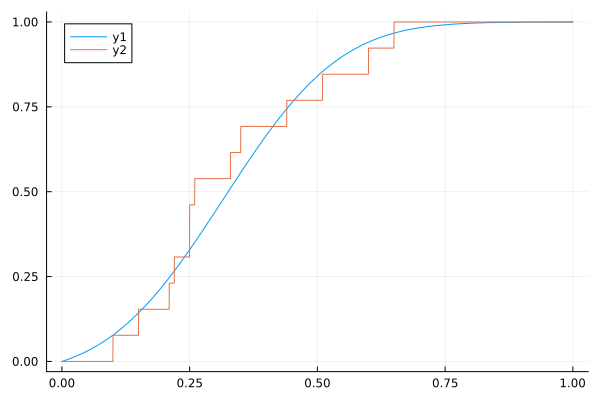

In [16]:
using StatsBase
gcdf=ecdf(data)
plot!(x -> gcdf(x),0,1)